In [3]:
import random
import mph
import numpy as np
import matplotlib.pyplot as plt
import os    
import time
from tqdm.notebook import tqdm
import pickle
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf

path = 'D:/Josh/Fall 2021/ML-LWA/1dsim.mph'

scattering = [1,2,5,6,7,51,53,56,57]

In [4]:
def start_client(path):
    global model
    global pymodel
    global client
    client = mph.start(version = '5.3a')
    pymodel = client.load(path)
    model = pymodel.java
    
def save_model():
    model.save(path)
    
def generate_image(random_pattern):
    adjusted = [x - 15 for x in random_pattern]
    out = np.flip(np.array([1 if x in adjusted else 0 for x in np.arange(36)]))
    return out
    
def simulate_random():
    global start_count
#     grids_of_interest = [random.randint(15,50) for i in range(0,random.randint(1,36))]
#     grids_of_interest = [random.randint(15,50) for i in range(0,18)]
    grids_of_interest = random.sample(range(15,51),18)
    this_scattering = scattering + grids_of_interest
    
    model.physics("emw").feature("sctr1").selection().set(this_scattering);
    model.physics("emw").feature("ffd1").feature("ffc1").selection().set(grids_of_interest);

    model.geom("geom1").runAll();
    model.mesh().run();
    model.sol("sol1").runAll();
    
    model.result("pg4").set("data", 'dset1')
    model.result("pg4").feature("ff1").run()
    model.result().export("plot1").set("filename", save_str + '.csv')
    model.result().export("plot1").set("plotgroup", "pg4")
    model.result().export("plot1").set("plot", "ff1")
    
    model.result().export("plot1").run()

    return grids_of_interest

# def simulate(vals):
#     global start_count
#     grids_of_interest = vals
#     this_scattering = scattering + grids_of_interest
#     print(this_scattering)
    
#     model.physics("emw").feature("sctr1").selection().set(this_scattering);
#     model.physics("emw").feature("ffd1").feature("ffc1").selection().set(grids_of_interest);

#     model.geom("geom1").runAll();
#     model.mesh().run();
#     model.sol("sol1").runAll();
    
#     model.result("pg4").set("data", 'dset1')
#     model.result("pg4").feature("ff1").run()
#     model.result().export("plot1").set("filename", save_str + '.csv')
#     model.result().export("plot1").set("plotgroup", "pg4")
#     model.result().export("plot1").set("plot", "ff1")
    
#     model.result().export("plot1").run()

#     return grids_of_interest

<h1>Please don't close out of this, very long simulation in progress! Using the computer is fine just don't close this window, thanks!</h1>

<h4>Light simulations should work fine but if you need to do anything heavy, click Kernel in the toolbar above and just hit shutdown, just shoot me (Josh) an email if you need to do that.</h4>

In [7]:
for instance in tqdm(np.arange(10)):
    img_list = []

    save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/1dconstantslots/' + str(int(time.time()))

    start_client(path)
    start_time = time.time()
    for i in tqdm(np.arange(500)):
        goi = simulate_random()
        array = generate_image(goi)
        img_list.append(array)

    print(time.time() - start_time, 'seconds')

    with open(save_str + '.pkl', 'wb') as file:
        pickle.dump(img_list, file)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

19595.60267353058 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

19666.000439167023 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

19799.321996688843 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

19905.43167614937 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

19986.649898290634 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

20188.815554380417 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

20296.829936265945 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

20434.855102539062 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

20611.35325694084 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

20904.811609506607 seconds


In [ ]:
model.save('D:/Josh/Fall 2021/ML-LWA/check1d2.mph')

In [ ]:
plt.imshow(array.reshape([36,1,1]))

In [7]:
with open('1d/peaks_to_slot/results/generated_slots.pkl', 'rb') as pkl_file:
    data = pickle.load(pkl_file)

In [16]:
true = tf.squeeze(tf.stack([x[1] for x in data]))
prediction = tf.squeeze(tf.stack([x[2] for x in data]))

In [17]:
total_slots = 36 - tf.reduce_sum(true,axis=1)

prediction_sorted = tf.argsort(prediction, axis=1)

gathered = tf.gather(prediction_sorted, total_slots,axis=1,batch_dims=1)
        # print(gathered.shape)
        # print(gathered)

minny = tf.repeat(tf.expand_dims(tf.gather(prediction, gathered, axis=1,batch_dims=1),axis=1),axis=1,repeats = true.shape[1])
        # print(prediction.shape)
        # print(minny.shape)

rounded = tf.greater_equal(prediction,minny)

In [23]:
rounded.shape
prediction.shape

TensorShape([10, 36])

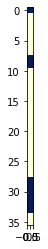

In [21]:
plt.imshow(tf.expand_dims(rounded[0],1),cmap='YlGnBu')

In [46]:
np.where(np.flip(rounded[0]))[0] + 15

array([17, 18, 19, 20, 21, 22, 41, 42, 50], dtype=int64)

In [48]:
tf.round(prediction[0])

<tf.Tensor: shape=(36,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0.], dtype=float32)>

In [45]:
np.where(np.flip(tf.round(prediction[0])))[0] + 15

array([21, 22], dtype=int64)

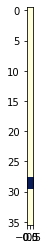

In [49]:
plt.imshow(tf.expand_dims(generate_image(np.where(np.flip(tf.round(prediction[0])))[0] + 15),1),cmap='YlGnBu')

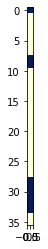

In [39]:
plt.imshow(tf.expand_dims(generate_image(np.where(np.flip(rounded[0]))[0] + 15),1),cmap='YlGnBu')

In [51]:
start_client(path)

In [57]:
img_list = []

save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/1d/' + str(int(time.time()))

start_client(path)
start_time = time.time()
for i in tqdm(np.arange(10)):
    
    assump = list(np.where(np.flip(rounded[i]))[0] + 15)

    naive = list(np.where(np.flip(tf.round(prediction[i])))[0] + 15)
    
    goi = simulate(assump)
    array = generate_image(goi)
    img_list.append(array)
    
    goi = simulate(naive)
    array = generate_image(goi)
    img_list.append(array)

print(time.time() - start_time, 'seconds')

with open(save_str + '.pkl', 'wb') as file:
    pickle.dump(img_list, file)

  0%|          | 0/10 [00:00<?, ?it/s]

[1, 2, 5, 6, 7, 51, 53, 56, 57, 17, 18, 19, 20, 21, 22, 41, 42, 50]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 21, 22]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 23, 25, 31, 45, 46, 47, 48, 50]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 22, 23, 25, 31, 44, 45, 46, 47, 48, 50]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 15, 16, 17, 28, 29, 32, 33, 34, 35, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 15, 16, 17, 23, 28, 29, 31, 32, 33, 34, 35, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 15, 16, 17, 28, 29, 35, 36, 37, 38, 40, 46, 47, 48, 49, 50]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 15, 16, 17, 28, 29, 30, 35, 36, 37, 38, 39, 40, 41, 46, 47, 48, 49, 50]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 22, 23, 27, 29, 30, 31, 32, 34, 35, 42]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 42]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 18, 22, 24, 25, 26, 27, 28, 29, 30, 31, 35, 36, 37, 38, 41, 42, 48, 49]
[1, 2, 5, 6, 7, 51, 53, 56, 57, 17, 18, 21, 22, 23, 24, 

In [60]:
test = np.array([1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [63]:
img_list = []

save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/1d/' + str(int(time.time()))

start_client(path)
start_time = time.time()
    
assump = list(np.where(np.flip(test))[0] + 15)
    
goi = simulate(assump)
array = generate_image(goi)
img_list.append(array)



print(time.time() - start_time, 'seconds')

with open(save_str + '.pkl', 'wb') as file:
    pickle.dump(img_list, file)

[1, 2, 5, 6, 7, 51, 53, 56, 57, 36, 39, 41, 43, 45, 46, 48, 50]
47.66638159751892 seconds
